In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [2]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['target_name'] = df['target'].map(lambda x: iris.target_names[x])
display(df.head())

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nAny missing values?\n", df.isnull().sum())
display(df['target_name'].value_counts())

Shape: (150, 6)

Dtypes:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int64
target_name           object
dtype: object

Any missing values?
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
target_name          0
dtype: int64


target_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [4]:
X = df[iris.feature_names].values
y = df['target'].values
print("Features shape:", X.shape, "Target shape:", y.shape)

Features shape: (150, 4) Target shape: (150,)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

Train size: 105 Test size: 45


In [6]:
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Predictions (first 10):", y_pred[:10])
print("True labels   (first 10):", y_test[:10])

Predictions (first 10): [2 1 1 1 2 2 1 1 0 2]
True labels   (first 10): [2 1 2 1 2 2 1 1 0 2]


In [7]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=iris.target_names, columns=iris.target_names)
display(cm_df)

,setosa,versicolor,virginica
setosa,15,0,0
versicolor,0,14,1
virginica,0,3,12


In [8]:
total = cm.sum()
tp = np.diag(cm)
fp = cm.sum(axis=0) - tp
fn = cm.sum(axis=1) - tp
tn = total - (tp + fp + fn)
per_class_df = pd.DataFrame({
    'class': iris.target_names,
    'TP': tp,
    'FP': fp,
    'FN': fn,
    'TN': tn
})
display(per_class_df.set_index('class'))

,TP,FP,FN,TN
class,,,,
setosa,15,0,0,30
versicolor,14,3,1,27
virginica,12,1,3,29


In [9]:
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
precision_macro = precision_score(y_test, y_pred, average='macro', zero_division=0)
recall_macro = recall_score(y_test, y_pred, average='macro', zero_division=0)
precision_weighted = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall_weighted = recall_score(y_test, y_pred, average='weighted', zero_division=0)

print(f"Overall accuracy: {accuracy:.4f}")
print(f"Overall error rate: {error_rate:.4f}")
print(f"Precision (macro): {precision_macro:.4f}")
print(f"Recall (macro): {recall_macro:.4f}")
print(classification_report(y_test, y_pred, target_names=iris.target_names, zero_division=0))

Overall accuracy: 0.9111
Overall error rate: 0.0889
Precision (macro): 0.9155
Recall (macro): 0.9111
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



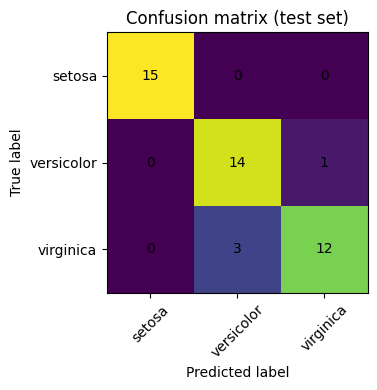

In [10]:
plt.figure(figsize=(6,4))
plt.imshow(cm, interpolation='nearest')
plt.title("Confusion matrix (test set)")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks(ticks=[0,1,2], labels=iris.target_names, rotation=45)
plt.yticks(ticks=[0,1,2], labels=iris.target_names)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, str(cm[i,j]), ha='center', va='center')
plt.tight_layout()
plt.show()